<a href="https://colab.research.google.com/github/w114050009-maker/MathAnalysisDataSci/blob/main/DataSciMath_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd

drive.mount('/content/drive') #mount google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image shape dimension: (360, 556, 3)
Image file size: 39.615 KB


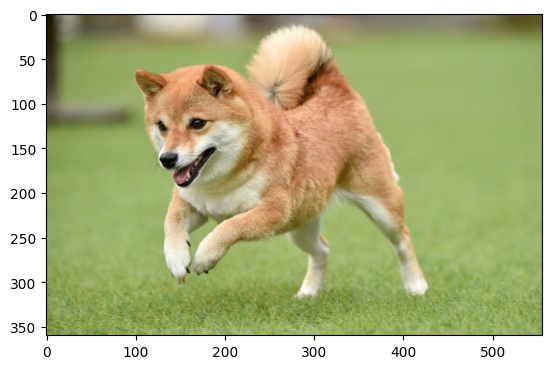

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/mathAnalysis/picture/"

img = mpimg.imread(os.path.join(path, "shiba.jpg"))

plt.imshow(img)
#plt.axis('off')  # 隱藏座標軸
#plt.show()

print(f"Image shape dimension: {img.shape}")
img_size = os.path.getsize(os.path.join(path,"shiba.jpg")) / 1024 #KB
print(f"Image file size: {img_size:.3f} KB")

In [3]:
# Save image
def save_image(img, filename, colormap=None):
  fullpath = os.path.join(path, filename)
  if os.path.exists(fullpath):
    os.remove(fullpath)
  mpimg.imsave(fullpath, img, cmap=colormap)

R channel[:10, :10]:
[[23 23 24 25 25 27 34 41 52 61]
 [23 23 24 25 25 27 34 41 51 61]
 [24 24 25 26 26 27 34 42 51 60]
 [24 24 25 26 26 27 34 42 50 60]
 [26 26 27 28 27 29 35 43 51 61]
 [27 27 28 29 28 29 36 43 50 60]
 [28 28 28 29 28 29 36 43 49 58]
 [28 28 29 29 28 29 36 43 47 57]
 [28 28 28 30 30 31 37 43 48 61]
 [29 28 28 30 30 31 37 43 47 59]]
G channel[:10, :10]:
[[18 17 18 19 20 22 29 37 51 60]
 [18 18 18 19 20 22 29 37 50 60]
 [19 19 19 20 21 22 30 38 50 59]
 [19 19 20 21 21 22 30 38 49 59]
 [19 19 20 21 20 23 29 37 49 59]
 [20 20 21 22 21 23 30 38 48 58]
 [21 21 21 22 21 23 30 38 47 56]
 [22 21 22 22 21 23 30 38 45 55]
 [22 22 22 24 24 25 31 37 46 59]
 [23 22 22 24 24 25 31 37 45 57]]
B channel[:10, :10]:
[[ 0  1  2  3  1  2  7 12 30 40]
 [ 0  0  2  3  1  2  7 12 29 40]
 [ 0  0  3  4  2  2  5 11 29 39]
 [ 0  0  1  2  2  0  5 11 28 38]
 [ 0  1  2  3  1  1  5 11 26 38]
 [ 1  1  3  4  2  1  4  9 25 37]
 [ 2  2  2  3  2  0  4  9 24 35]
 [ 0  2  3  3  2  0  4  9 20 32]
 [ 0  0  0 

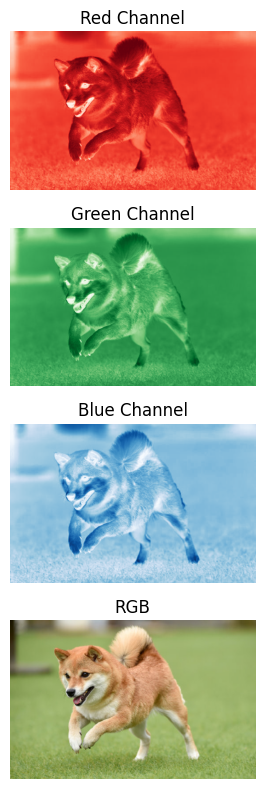

Image shape dimension: (360, 556, 3)
Image file size: 25.059 KB


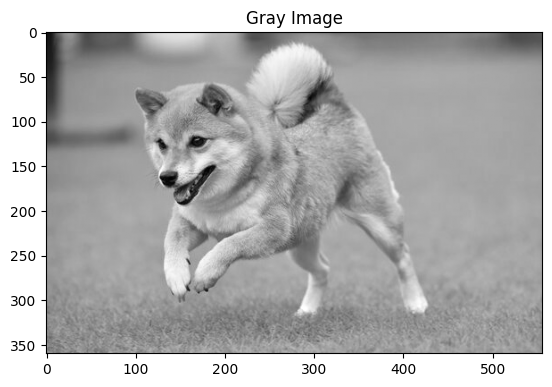

In [4]:
arr_shiba = np.array(img) #transform from img to array

print("R channel[:10, :10]:\n%s" % arr_shiba[:10, :10, 0])
print("G channel[:10, :10]:\n%s" % arr_shiba[:10, :10, 1])
print("B channel[:10, :10]:\n%s" % arr_shiba[:10, :10, 2])

img_R = arr_shiba[:,:,0]
img_G = arr_shiba[:,:,1]
img_B = arr_shiba[:,:,2]

save_image(img_R, "shiba_R.jpg", colormap="Reds")
save_image(img_G, "shiba_G.jpg", colormap="Greens")
save_image(img_B, "shiba_B.jpg", colormap="Blues")

# 建立 1x3 的 subplot
fig, axes = plt.subplots(4, 1, figsize=(4, 8))

# 顯示 R channel（紅色）
axes[0].imshow(img_R, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

# 顯示 G channel（綠色）
axes[1].imshow(img_G, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

# 顯示 B channel（藍色）
axes[2].imshow(img_B, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

# Compse RGB channels
img_rgb = np.dstack((img_R, img_G, img_B))

# 顯示RGB Compose
axes[3].imshow(img_rgb,)
axes[3].set_title('RGB')
axes[3].axis('off')

plt.tight_layout()
plt.show()

save_image(img_rgb, "shiba_RGB.jpg")
img_size = os.path.getsize(os.path.join(path,"shiba_RGB.jpg")) / 1024
print(f"Image shape dimension: {img_rgb.shape}")
print(f"Image file size: {img_size:.3f} KB")

# Use luminosity method to get gray image
img_gray = np.dot(arr_shiba[..., :3], [0.299, 0.587, 0.114])
plt.title("Gray Image")
plt.imshow(img_gray, cmap='gray')
#plt.axis('off')  # 隱藏座標軸
#plt.show(

save_image(img_gray, "shiba_gray.jpg", colormap="gray")

In [5]:
# 2-norm
def norm2(a, ak):
  return np.linalg.norm(a - ak, 2)

In [6]:
# MSE: Mean Square Error
def mse(image, image_svd):
  return np.mean((image.astype(np.float64) - image_svd.astype(np.float64))\
          ** 2) #Covert to float

In [7]:
def svd_process(image, k, rgb):
  # Decompos image by SVD
  u, sigma, v = np.linalg.svd(image, full_matrices=False)

  #Ak = U * A * V^T & :k means k-1
  Ak = np.dot(u[:,:k], np.dot(np.diag(sigma[:k]), v[:k,:]))

  norm = norm2(image, Ak)

  m = mse(image, Ak)

  # 0 ~ 255
  Ak[Ak < 0] = 0
  Ak[Ak > 255] = 255

  Ak = np.rint(Ak).astype('uint8') #round off Ak

  return Ak, sigma, norm, sigma[k], m

In [8]:
# PSNR - 峰值訊噪比
def psnr(image, image_svd):
  m = mse(image, image_svd)
  if m < 1e-10:
    return 100
  else:
    return 10 * math.log10(255.0**2 / m) #255=2**8-1

In [9]:
# compression Ratio 像素壓縮比
def compression_rate(img, img_svd, k):
  # compression ratio = (m * n) / (k * (m + n + 1))
  m, n = img.shape[:2]
  size_img = m * n
  size_img_svd = k * (m + n + 1)

  return (size_img / size_img_svd)

In [10]:
# Get the file size compression ratio
def file_size_cr(img, img_svd):
  img_size = os.path.getsize(os.path.join(path, img)) / 1024  # KB
  img_svd_size = os.path.getsize(os.path.join(path, img_svd)) / 1024  # KB

  return img_size, img_svd_size, (img_size / img_svd_size)

In [11]:
def showLinear(table):
  fig, axs = plt.subplots(3, 2, figsize=(12, 10))

  # Plot 1: Sigma k+1
  axs[0, 0].plot(table[:, 0], table[:, 2], 's-', color='green', label="Sigma k+1")
  axs[0, 0].plot(table[:, 0], table[:, 1], 'o-', color='blue', label="2-norm")
  axs[0, 0].set_xlabel("k", fontsize=20, labelpad=10)
  axs[0, 0].set_ylabel("Sigma k+1", fontsize=20, labelpad=10)
  axs[0, 0].legend(loc="best", fontsize=15)

  # Plot 2: MSE
  axs[0, 1].plot(table[:, 0], table[:, 3], 's-', color='blue', label="MSE")
  axs[0, 1].set_xlabel("k", fontsize=20, labelpad=10)
  axs[0, 1].set_ylabel("MSE", fontsize=20, labelpad=10)
  axs[0, 1].legend(loc="best", fontsize=15)

  # Plot 3: Compression Ratio
  axs[1, 0].plot(table[:, 0], table[:, 4], 's-', color='orange', label="CR")
  axs[1, 0].set_xlabel("k", fontsize=20, labelpad=10)
  axs[1, 0].set_ylabel("CR", fontsize=20, labelpad=10)
  axs[1, 0].legend(loc="best", fontsize=15)

  # Plot 4: PSNR
  axs[1, 1].plot(table[:, 0], table[:, 5], 's-', color='red', label="PSNR")
  axs[1, 1].set_xlabel("k", fontsize=20, labelpad=10)
  axs[1, 1].set_ylabel("PSNR", fontsize=20, labelpad=10)
  axs[1, 1].legend(loc="best", fontsize=15)

  # Plot 5: File Size
  if table.shape[1] > 9:
    axs[2, 0].plot(table[:, 0], table[:, 9], '^-', color='blue', label="RGB Combined Size")
  axs[2, 0].plot(table[:, 0], table[:, 7], 's-', color='black', label="Size")
  axs[2, 0].plot(table[:, 0], table[:, 6], 'o-', color='yellow', label="Ori Size")
  axs[2, 0].set_xlabel("k", fontsize=20, labelpad=10)
  axs[2, 0].set_ylabel("Size(KB)", fontsize=20, labelpad=10)
  axs[2, 0].legend(loc="best", fontsize=15)

  # Plot 6: Size Compression Ratio
  axs[2, 1].plot(table[:, 0], table[:, 8], 's-', color='blue', label="Size CR")
  axs[2, 1].set_xlabel("k", fontsize=20, labelpad=10)
  axs[2, 1].set_ylabel("Size CR", fontsize=20, labelpad=10)
  axs[2, 1].legend(loc="best", fontsize=15)

  plt.tight_layout()

  plt.show()

**Gray**

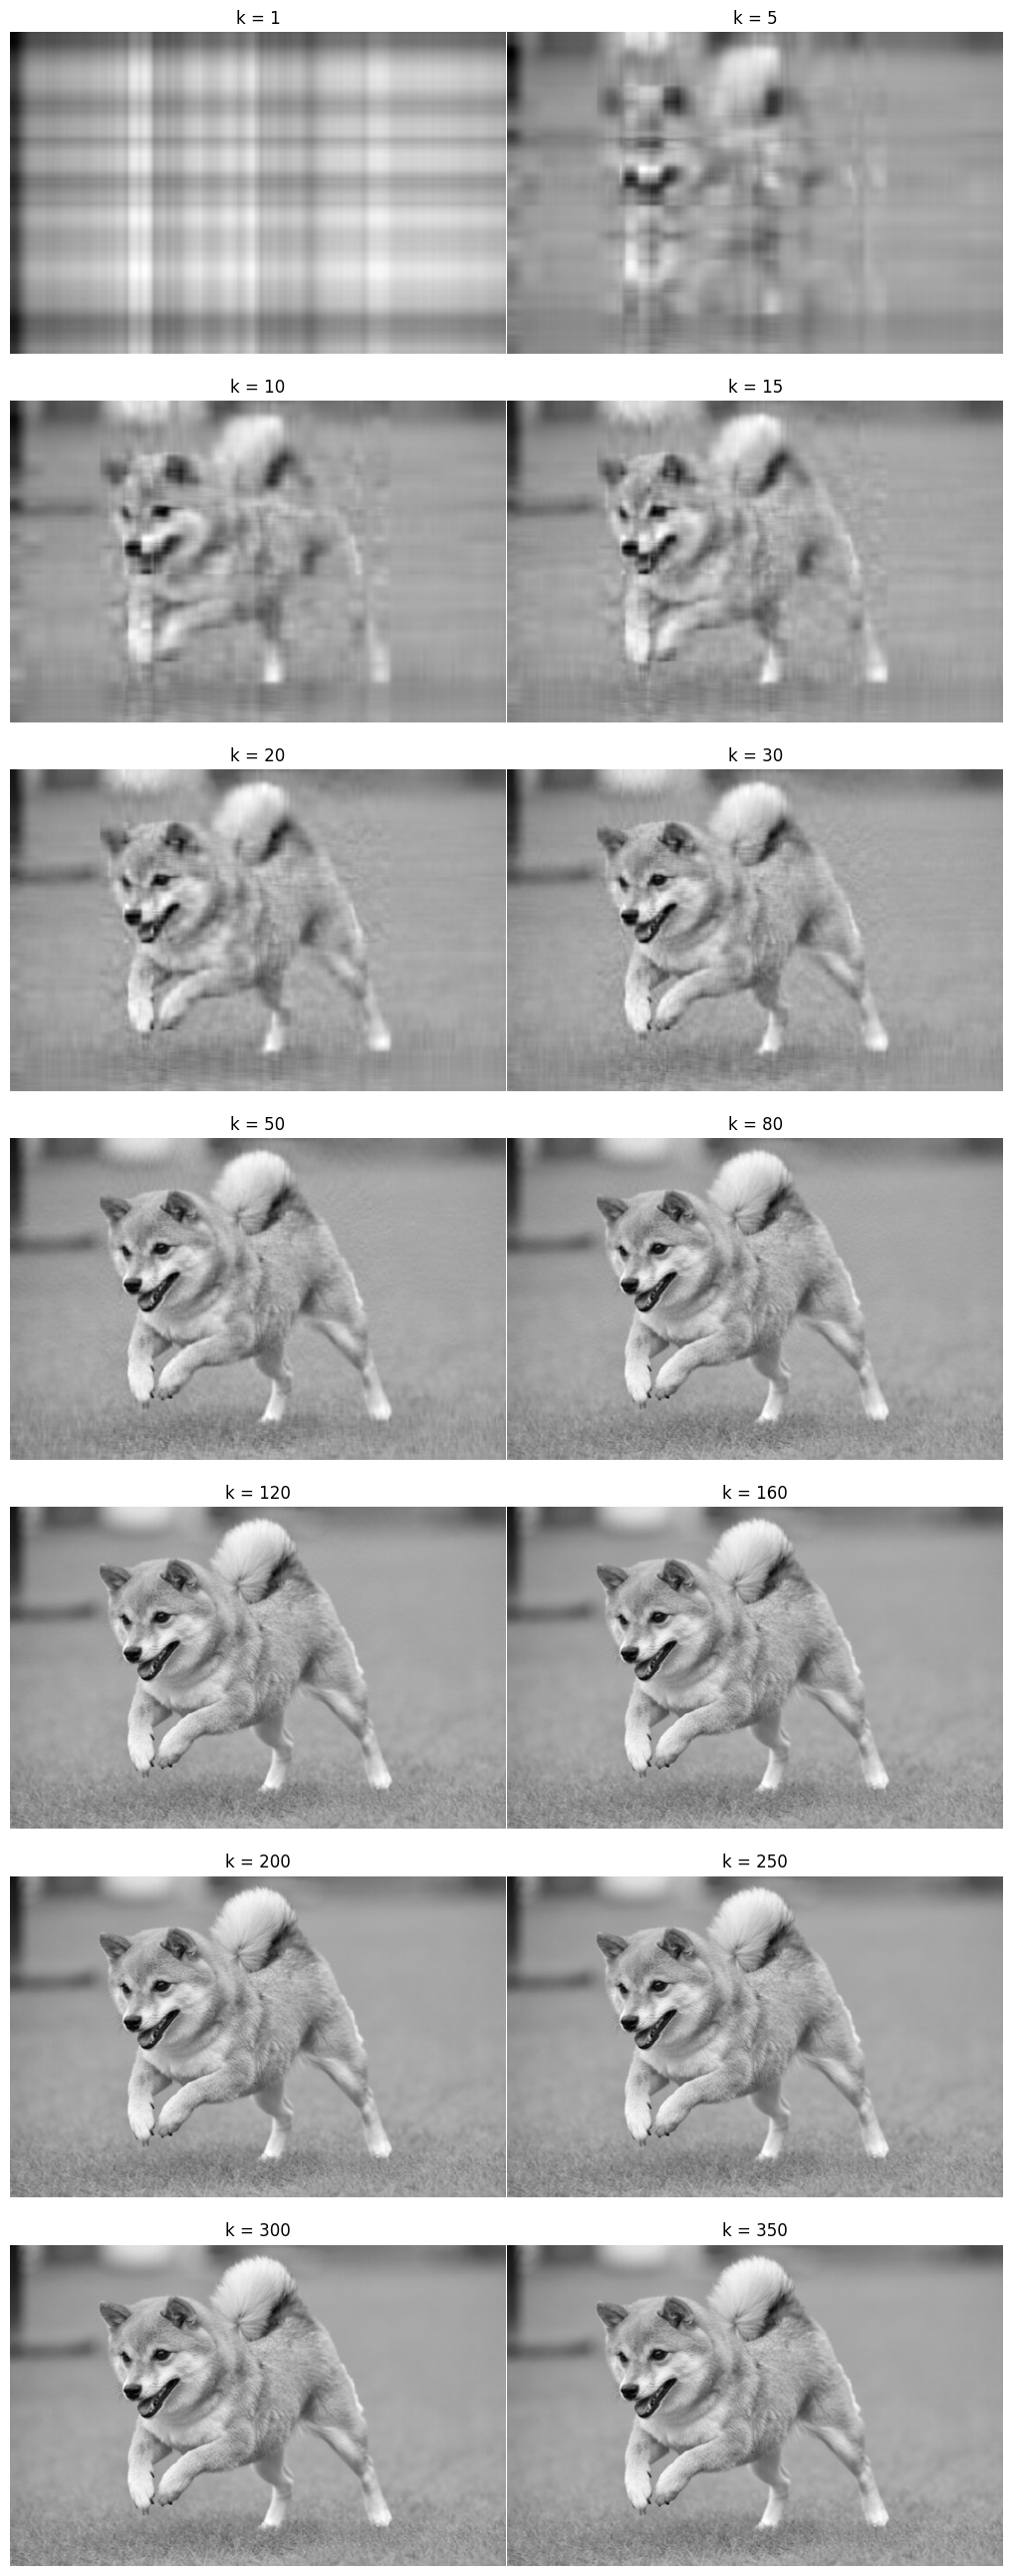

In [12]:
list_k = [1, 5, 10, 15, 20, 30, 50, 80, 120, 160, 200, 250, 300, 350, 400]

list_feature = ["K","2-norm","sigma k+1","CR","MSE","PSNR","Ori Size(KB)","Size(KB)","Size CR"]

# Use the grayscale image for SVD
img_gen = []
data = []

# Limit the range of k to the smaller dimension of the image (360)
max_k = min(img_gray.shape)
valid_list_k = [k for k in list_k if k < max_k]

fig, axes = plt.subplots(7, 2, figsize=(10, 26))

for i in valid_list_k:
  img_svd, sigma, norm, sigma_k1, m = svd_process(img_gray, i, "gray")
  img_gen.append(img_svd)

  filename_Ak = "shiba_gray" + "_k" + str(i) + ".jpg"
  save_image(img_svd, filename_Ak, colormap="gray")

  ori_size, svd_size, scr = file_size_cr("shiba_gray.jpg", filename_Ak)

  # Handle the case where sigma_kp1 is None
  data.append([i, norm, sigma_k1, compression_rate(img_gray, img_svd, i),
        m, psnr(img_gray, img_svd), ori_size, svd_size, scr])


for i, ax in enumerate(axes.flat):
  if i < len(img_gen): # Ensure we don't go out of bounds of img_gen
    #row = i % 7       # 先填第一列，再第二列
    #col = i // 7      # 每列從左到右
    row = i // 2       # 從左到右
    col = i % 2      # 從上到下
    ax = axes[row, col]
    ax.imshow(img_gen[i], cmap='gray') # Add cmap='gray' here
    ax.set_title(f'k = {valid_list_k[i]}')
    ax.axis('off')  # 隱藏座標軸
    #plt.show()
  else:
    fig.delaxes(ax) # Remove unused subplots
plt.tight_layout(pad=0.1)
plt.show()

In [13]:
table = pd.DataFrame(data, columns=list_feature)
table

K       2-norm    sigma k+1          CR         MSE       PSNR  \
0     1  5248.641845  5248.641845  218.276990  610.818733  20.270729   
1     5  2644.896875  2644.896875   43.655398  235.812877  24.403622   
2    10  1501.351642  1501.351642   21.827699  126.380439  27.110482   
3    15  1092.967108  1092.967108   14.551799   80.275732  29.081322   
4    20   803.501074   803.501074   10.913850   56.450927  30.607098   
5    30   527.011093   527.011093    7.275900   34.387460  32.757962   
6    50   319.576871   319.576871    4.365540   17.317560  35.726762   
7    80   198.404199   198.404199    2.728462    7.577533  39.289082   
8   120   117.137507   117.137507    1.818975    2.714863  43.660521   
9   160    71.768429    71.768429    1.364231    0.898904  48.222684   
10  200    41.474395    41.474395    1.091385    0.249057  53.130139   
11  250    16.772251    16.772251    0.873108    0.034278  60.121413   
12  300     6.182325     6.182325    0.727590    0.005444  62.210069   
13  350     2.803471     2.803471    0.623649    0.000292  62.421264   

    Ori Size(KB)   Size(KB)   Size CR  
0      23.256836  14.058594  1.654279  
1      23.256836  11.987305  1.940122  
2      23.256836  13.575195  1.713186  
3      23.256836  14.604492  1.592444  
4      23.256836  15.618164  1.489089  
5      23.256836  17.197266  1.352357  
6      23.256836  19.332031  1.203021  
7      23.256836  20.622070  1.127764  
8      23.256836  21.020508  1.106388  
9      23.256836  22.003906  1.056941  
10     23.256836  22.846680  1.017953  
11     23.256836  23.234375  1.000967  
12     23.256836  23.283203  0.998868  
13     23.256836  23.293945  0.998407

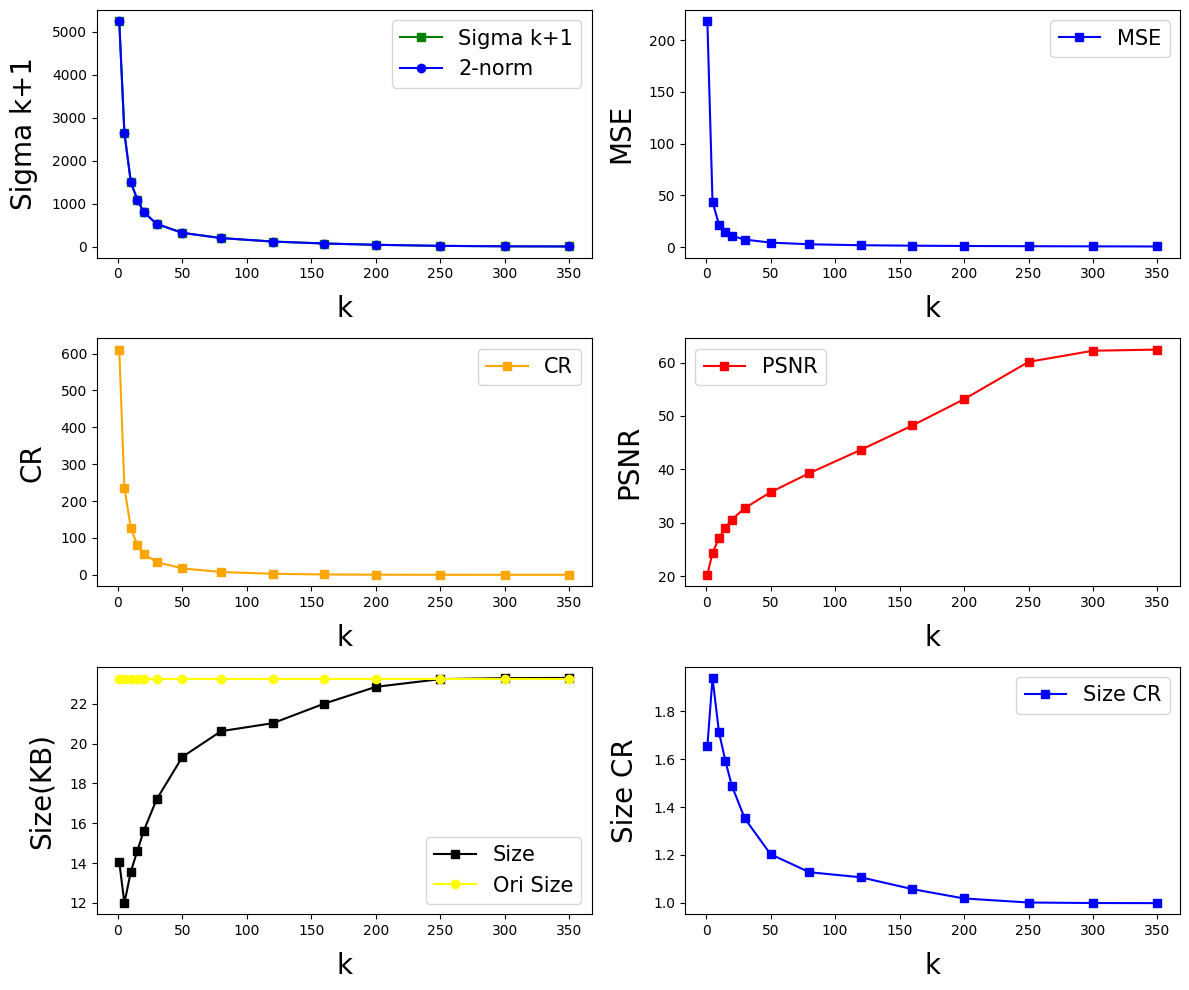

In [14]:
showLinear(table.values)

In [15]:
# sigma 为 SVD 得到的奇异值数组
def best_k(image, threshold=0.90):
  u, sigma, v = np.linalg.svd(image, full_matrices=False)
  total_energy = np.sum(sigma ** 2)
  cumulative_energy = 0
  print("sigma, ", sigma[1:2])
  print("sigma, ", sigma[1:2]**2)

  for i in range(1, min(image.shape[:2])): # iterate up to min(image.shape[:2])
    cumulative_energy = np.sum(sigma[:i] ** 2) # sum individual squared singular values
    if (cumulative_energy / total_energy) >= threshold:
      break
    # print("cumulative_energy,",cumulative_energy)

  print("total_energy,",total_energy)
  print("cumulative_energy,",cumulative_energy)
  print("k,",i+1)
  #return k

In [16]:
def best_k(image, threshold=0.9984):
    u, sigma, v = np.linalg.svd(image, full_matrices=False)
    total_energy = np.sum(sigma ** 2)
    cumulative = np.cumsum(sigma ** 2)
    k = np.argmax(cumulative / total_energy >= threshold) + 1
    return k


In [17]:
def find_elbow_k(x, y):
    # 直线两端点
    line_vec = np.array([x[-1] - x[0], y[-1] - y[0]])
    line_vec_norm = line_vec / np.linalg.norm(line_vec)

    # 计算点到直线距离
    distances = []
    for i in range(len(x)):
        point_vec = np.array([x[i] - x[0], y[i] - y[0]])
        proj_len = np.dot(point_vec, line_vec_norm)
        proj_point = proj_len * line_vec_norm
        dist_vec = point_vec - proj_point
        distances.append(np.linalg.norm(dist_vec))

    # 肘点对应最大距离
    elbow_idx = np.argmax(distances)
    return x[elbow_idx], y[elbow_idx]

# 使用示例
u, sigma, v = np.linalg.svd(img_gray, full_matrices=False)
k_values = np.arange(1, len(sigma)+1)
cumulative_energy_ratio = np.cumsum(sigma**2) / np.sum(sigma**2)

elbow_k, elbow_val = find_elbow_k(k_values, cumulative_energy_ratio)
print(f"Elbow at k={elbow_k}, cumulative energy={elbow_val:.4f}")

Elbow at k=27, cumulative energy=0.9984


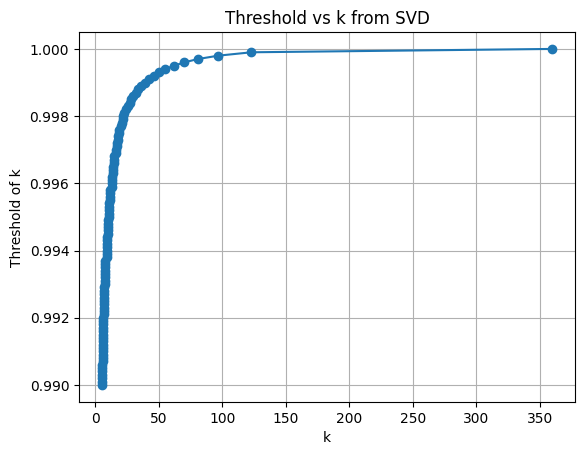

In [18]:
x_values = np.arange(0.99, 1, 0.0001)
y_values = [best_k(img_gray, x) for x in x_values]

plt.plot(y_values, x_values, marker='o')
plt.xlabel('k')
plt.ylabel('Threshold of k')
plt.title('Threshold vs k from SVD')
plt.grid(True)
plt.show()


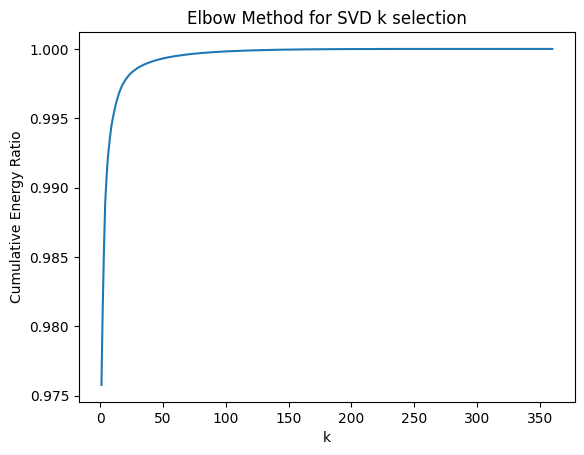

In [19]:
u, sigma, v = np.linalg.svd(img_gray, full_matrices=False)
energy = sigma**2
cumulative_energy_ratio = np.cumsum(energy) / np.sum(energy)

plt.plot(range(1, len(sigma)+1), cumulative_energy_ratio)

plt.xlabel('k')
plt.ylabel('Cumulative Energy Ratio')
plt.title('Elbow Method for SVD k selection')
plt.show()

**Color(RGB) - 3 Layers**

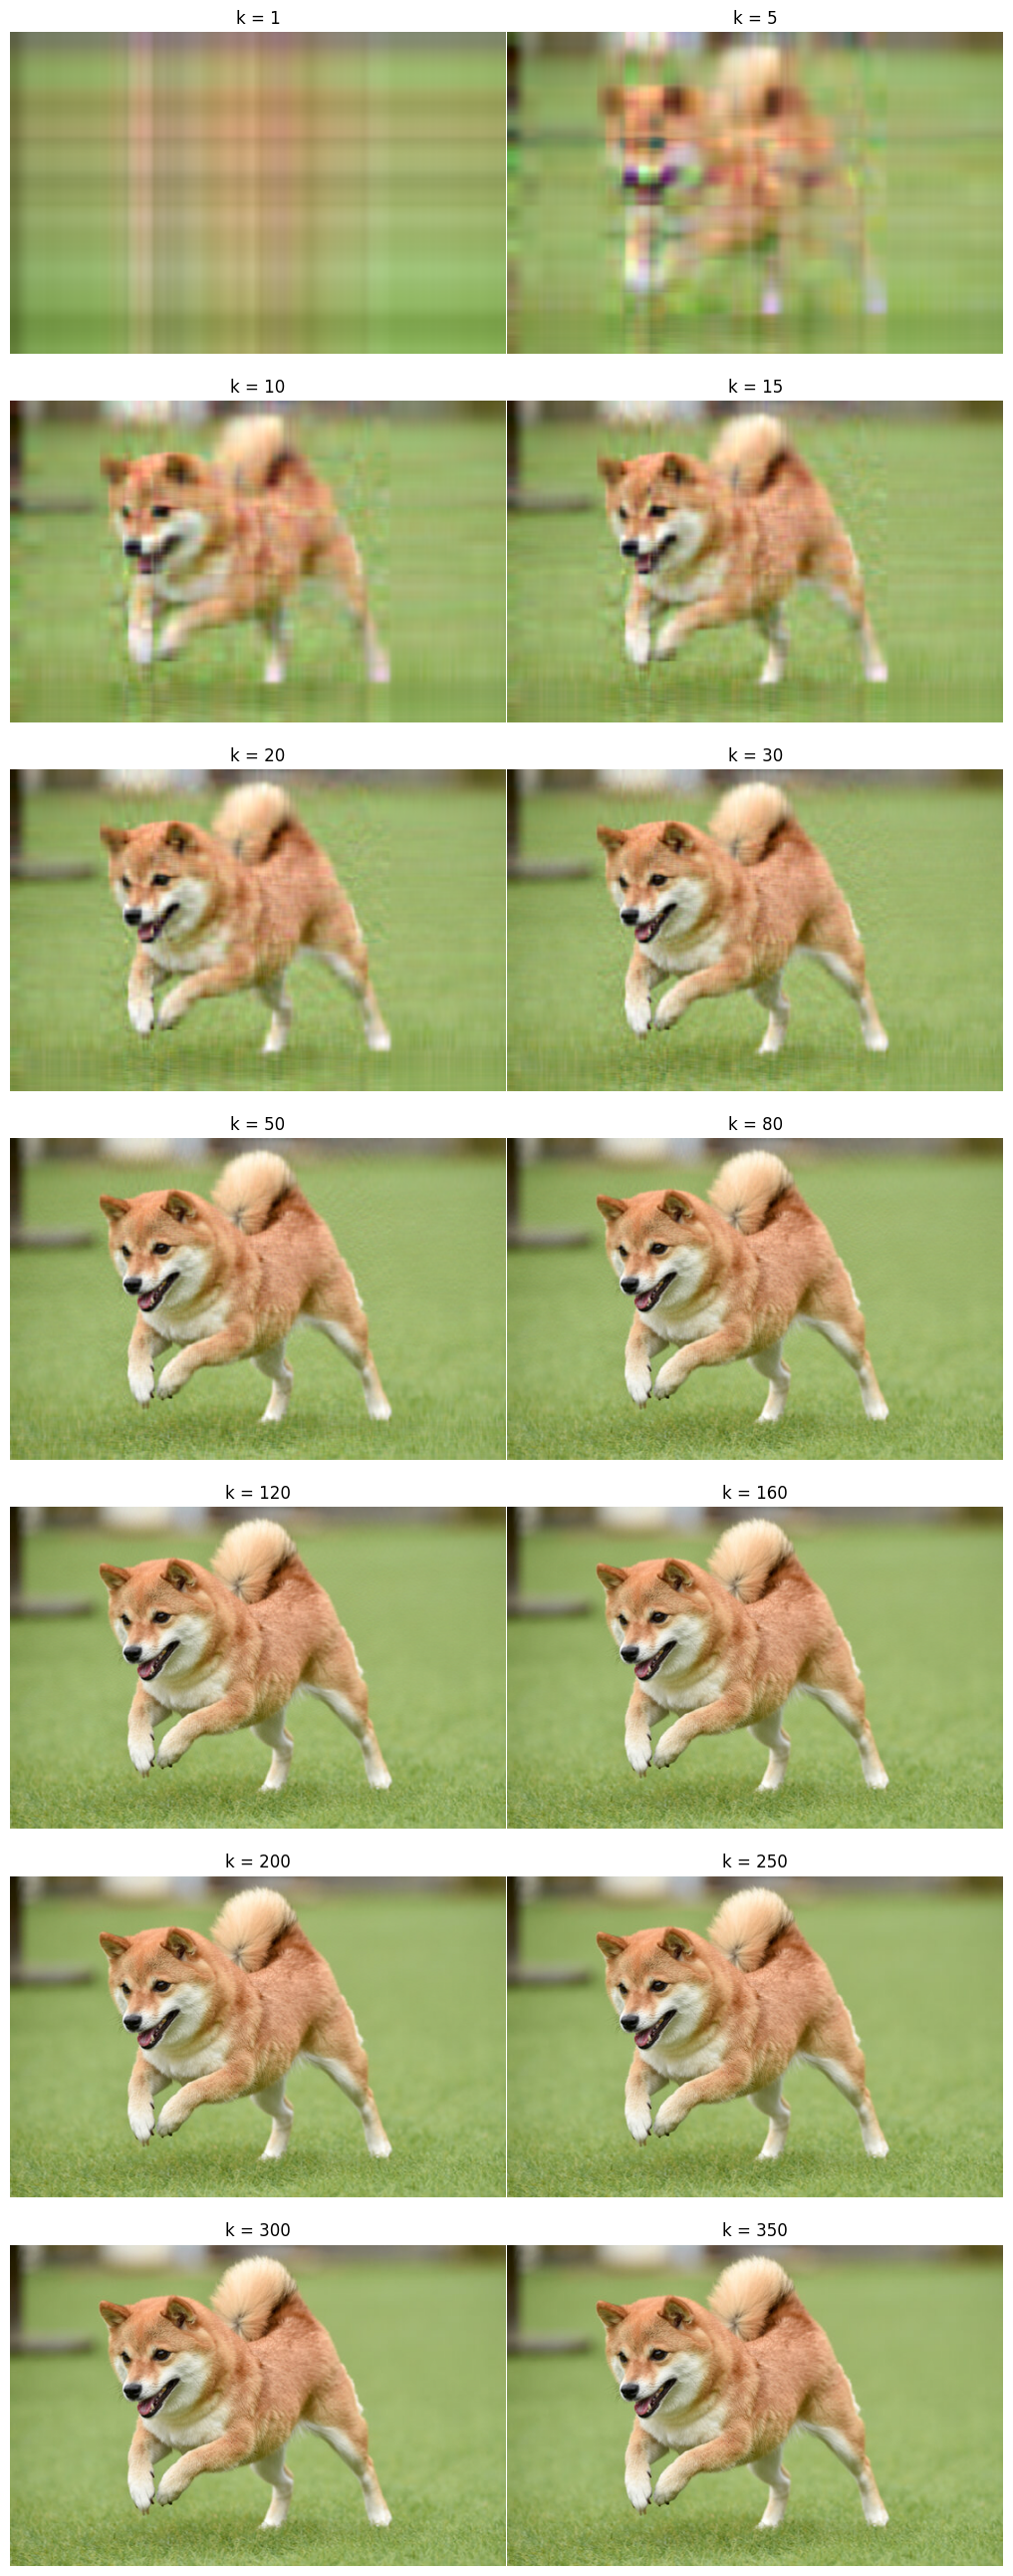

In [20]:
fig, axes = plt.subplots(7, 2, figsize=(10, 26))

img_gen = [] # Clear img_gen before processing RGB images
data = [] # Clear data before processing RGB images

# Limit the range of k to the smaller dimension of the image (360)
max_k = min(img.shape[:2])
valid_list_k = [k for k in list_k if k < max_k]

for i in valid_list_k:
  R, sigma_R, norm_R, sigmak1_R, m_R = svd_process(arr_shiba[:,:,0],i,"R")
  G, sigma_G, norm_G, sigmak1_G, m_G = svd_process(arr_shiba[:,:,1],i,"G")
  B, sigma_B, norm_B, sigmak1_B, m_B = svd_process(arr_shiba[:,:,2],i,"B")

  img_rgb_svd = np.dstack((R, G, B))
  img_gen.append(img_rgb_svd)

  filename_Ak = "shiba_rgb" + "_k" + str(i) + ".jpg"
  save_image(img_rgb_svd, filename_Ak)

  # Calculate average norm, sigma_k1, and mse for the RGB image
  avg_norm = (norm_R + norm_G + norm_B) / 3
  avg_sigmak1 = (sigmak1_R + sigmak1_G + sigmak1_B) / 3
  avg_m = (m_R + m_G + m_B) / 3

  ori_size, svd_size, scr = file_size_cr("shiba.jpg", filename_Ak)

  data.append([i, avg_norm, avg_sigmak1, compression_rate(arr_shiba, img_rgb_svd, i),
        avg_m, psnr(arr_shiba, img_rgb_svd), ori_size, svd_size, scr])

for i, ax in enumerate(axes.flat):
  if i < len(img_gen):
    #row = i % 7       # from row 1 to 7
    #col = i // 7      # from column 0 to 1
    row = i // 2       # from column 0 to 1
    col = i % 2      # from row 1 to 7
    ax = axes[row, col]
    ax.imshow(img_gen[i])
    ax.set_title(f'k = {valid_list_k[i]}')
    ax.axis('off')  # 隱藏座標軸
  else:
    fig.delaxes(ax) # Remove unused subplots
plt.tight_layout(pad=0.1)
plt.show()

In [21]:
table = pd.DataFrame(data, columns=list_feature)
table

K       2-norm    sigma k+1          CR         MSE        PSNR  \
0     1  5748.211478  5748.211478  218.276990  708.931819   19.624382   
1     5  2823.730234  2823.730234   43.655398  279.143401   23.672363   
2    10  1606.543097  1606.543097   21.827699  144.265316   26.541010   
3    15  1179.327366  1179.327366   14.551799   92.026262   28.493004   
4    20   868.364397   868.364397   10.913850   64.374247   30.040537   
5    30   566.839002   566.839002    7.275900   38.834692   32.234487   
6    50   338.306631   338.306631    4.365540   18.899839   35.352610   
7    80   206.291423   206.291423    2.728462    8.152491   38.974334   
8   120   121.066845   121.066845    1.818975    2.900098   43.385791   
9   160    74.342247    74.342247    1.364231    0.974393   47.899296   
10  200    42.851746    42.851746    1.091385    0.284013   52.757827   
11  250    18.230039    18.230039    0.873108    0.047262   63.041579   
12  300     7.779032     7.779032    0.727590    0.008684   80.072477   
13  350     3.413490     3.413490    0.623649    0.000445  100.000000   

    Ori Size(KB)   Size(KB)   Size CR  
0      39.615234   9.385742  4.220789  
1      39.615234  13.358398  2.965568  
2      39.615234  15.192383  2.607572  
3      39.615234  16.348633  2.423153  
4      39.615234  17.174805  2.306590  
5      39.615234  18.532227  2.137640  
6      39.615234  20.465820  1.935678  
7      39.615234  21.865234  1.811791  
8      39.615234  22.468750  1.763126  
9      39.615234  23.712891  1.670620  
10     39.615234  24.631836  1.608294  
11     39.615234  25.021484  1.583249  
12     39.615234  25.066406  1.580411  
13     39.615234  25.058594  1.580904

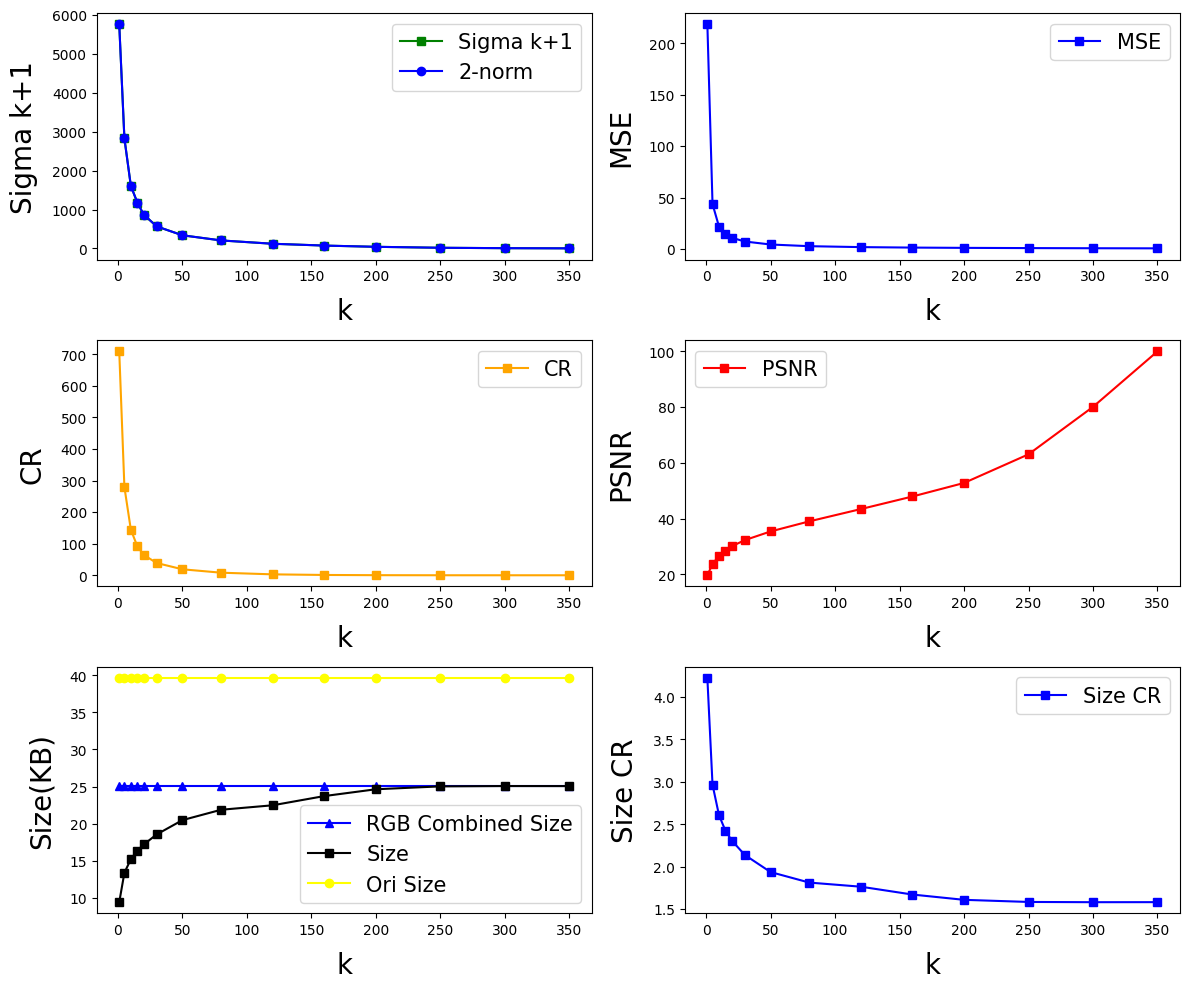

In [22]:
rgb_shiba_size = os.path.getsize(os.path.join(path,"shiba_rgb.jpg")) / 1024 #KB
# print(f"Image shape dimension: {img_rgb.shape}")
# print(f"Image file size: {rgb_shiba_size:.3f} KB")
table['RGB Combined Size(KB)'] = rgb_shiba_size
# print(table)

showLinear(table.values)